# Analiza LEGO setov 
Analizirajmo podatke iz datoteke _podatki.csv_.
Delovne hipoteze so:
- večina izdelkov je na zalogi,
- povprečna cena izdelka je 150€,
- povprečna ocena izdelkov je višja od 4,
- izdelki, ki jih ni na zalogi so povprečno dražji in bolje ocenjeni od ostalih.

In [73]:
import pandas as pd
legoti = pd.read_csv("Datoteke/podatki.csv", index_col="id")

In [74]:
legoti

,ime,ocena,zaloga,cena
id,,,,
10255,Assembly Square,4.7675,True,25999
10265,Ford Mustang,4.8075,True,14999
10266,NASA Apollo 11 Lunar Lander,4.8272,True,8999
10270,Bookshop,4.2209,True,16999
10271,Fiat 500,4.2455,True,6999
...,...,...,...,...
88015,Battery Box,2.0000,True,2999
88016,Large Hub,5.0000,True,20999
88017,Large Angular Motor,NaN,True,2999


Zgoraj je za orientacijo prikazana preglednica vseh setov.

In [75]:

legoti.groupby("zaloga").size()

zaloga
False     232
True     1002
dtype: int64

<AxesSubplot: xlabel='zaloga'>

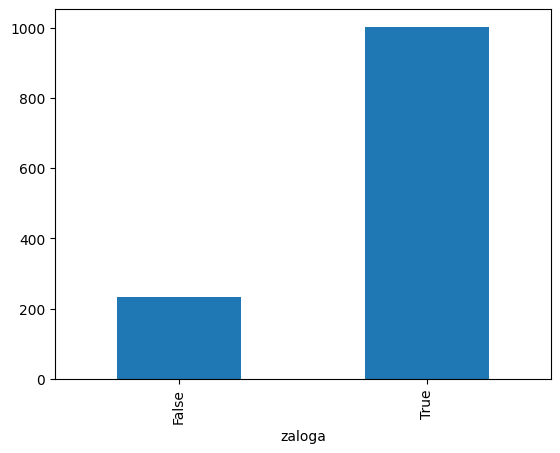

In [76]:

legoti.groupby("zaloga").size().plot.bar()

Če podatke prefiltriramo glede na to, če so na zalogi ali ne, opazimo, da sta na zalogi 1002 seta izmed 1234 setov (kar je prikazano v zgornji preglednici). To pomeni, da večina setov v spletni trgovini res *je* na zalogi. Tudi na zgornjem stolpičnem prikazu je to lepo vidno.

In [77]:
round(0.01 * legoti.cena.mean(), 2)

50.02

<AxesSubplot: xlabel='cenovni razred'>

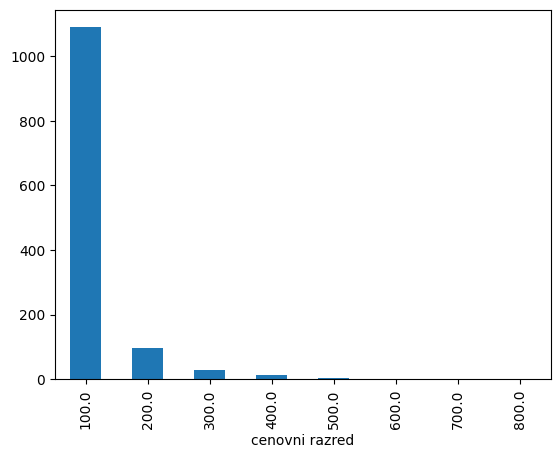

In [78]:
legoti["cenovni razred"] = 100 * (1 + 0.01 * legoti.cena // 100)
legoti.groupby("cenovni razred").size().plot.bar()

Preprost izračun povprečja cen pokaže, da je povprečna cena LEGO seta v spletni trgovini 50.02 €, kar je le tretjina cene predvidene v hipotezi (150 €). Oceno v hipotezi smo torej postavili previsoko.
V zgornjem diagramu so seti razdeljeni v cenovne razrede po 100 €, opazimo lahko, da v spletni trgovini prevladujejo seti, ki stanejo do 100 €, poslednično je povprečna cena nižja od tiste v hipotezi.

In [79]:
round(legoti.ocena.mean(), 2)

4.5

<AxesSubplot: >

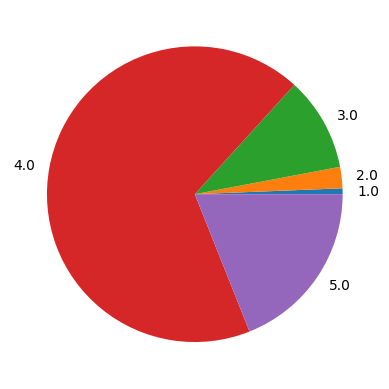

In [80]:
legoti["celoštevilska ocena"] = legoti.ocena // 1
legoti.groupby("celoštevilska ocena").size().plot.pie()

Podobno lahko izračunamo tudi povprečno oceno LEGO setov in vidimo, da je le-ta 4.5, torej je res višja od 4. V razpredelnico sem za lažji pregled dodal stolpec z zaokroženimi ocenami setov navzdol (funckija floor). V zgornjem strukturnem krogu je razvidno, da je velika večina setov ocenjenih z vsaj 4.

In [81]:
na_zalogi = legoti[legoti.zaloga == True]
ni_na_zalogi = legoti[legoti.zaloga == False]
a = round(0.01 * ni_na_zalogi.cena.mean(), 2)
b = round(0.01 * na_zalogi.cena.mean(), 2)
a, b

(48.1, 50.47)

In [82]:
c = round(ni_na_zalogi.ocena.mean(), 2)
d = round(na_zalogi.ocena.mean(), 2)
c, d

(4.49, 4.5)

<AxesSubplot: xlabel='cenovni razred'>

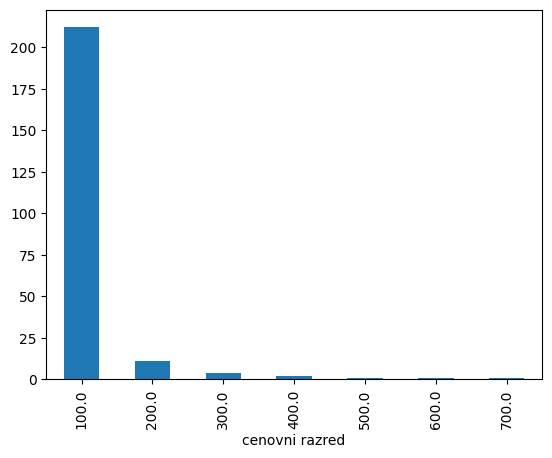

In [83]:
legoti[legoti.zaloga == False].groupby("cenovni razred").size().plot.bar()

Podatke o povprečni ceni in oceni izračunamo še posebej na setih, ki niso oz. so na zalogi. V nasprotju s hipotezo je povprečna cena izdelkov, ki jih ni na zalogi, nekoliko nižja od skupnega povprečja (48.1 < 50.02), povprečna ocena pa je praktično zanemarljivo nižja od skupne povprečne ocene (4.49 < 4.5).
Povprečna cena izdelkov na zalogi pa je posledično nekoliko višja od skupnega povprečja (50.47). Na prikazu s stolpci vidimo še porazdelitev izdelkov, ki jih ni na zalogi, na cenovne razrede po 100 €.

<AxesSubplot: xlabel='ocena', ylabel='EUR cena'>

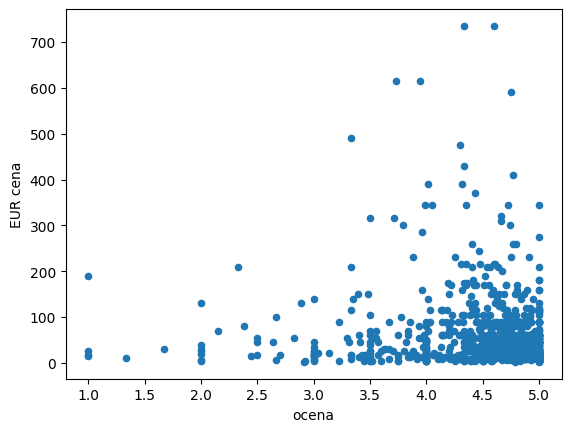

In [84]:
legoti["EUR cena"] = 0.01 * legoti.cena
legoti.plot.scatter(x="ocena", y="EUR cena")

Za konec si dodatno oglejmo še ali obstaja korelacija med oceno seta in njegovo ceno. V ta namen so v zgornjem raztrosnem grafu na abscisni osi vnešene ocene LEGO setov, na ordinatni osi pa njihove cene v €. Opazimo, da je kakršnokoli povezavo težko določiti, saj so ne glede na višino ocene v spletni trgovini na voljo seti različnih cenovnih razredov. Ne bi mogli torej trditi, da so bolje ocenjeni seti dražji.

Zaključil bi s spoznanjem, da prav za prav ta analiza ni pokazala kaj dosti novega. V splošnem se vendarle *ve*, da bo uporabnik pri nakupu LEGO kock na koncu zadovoljen ne glede na finančni vložek, glavna težava je torej le, če bomo iskani set uspeli kje najti :).